In [1]:
import pandas as pd
import datetime

d_parser = lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv("FIFA.csv", parse_dates=['Date'], date_parser=d_parser).dropna(how='all')
df.head(2)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686


In [2]:
df.shape

(530000, 16)

In [63]:
filt = df['Orig_Tweet'].str.contains('France')
df.loc[filt, 'Orig_Tweet'].count()

78763

In [66]:
df['No_Of_Tweets'] = 1
new_df = df[['Place', 'No_Of_Tweets']].groupby('Place').sum()
new_df.sort_values(by='No_Of_Tweets', ascending=False, inplace=True)
new_df.head(5)

,No_Of_Tweets
Place,
"Lagos, Nigeria",4953
"London, England",4701
Nigeria,3619
London,3225
India,2851


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Dates'] = df['Date'].dt.date

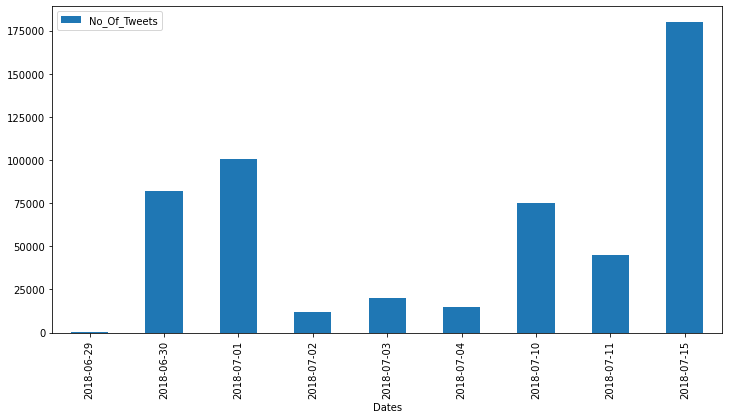

In [71]:
jff = df.groupby('Dates').sum()
jff['No_Of_Tweets'].plot(kind='bar', figsize=(12,6), legend = True)

In [72]:
final = df.copy()['2018-7-15']
final[['Place', 'No_Of_Tweets']].dropna(how='all', inplace=True)
sums = final[['Place', 'No_Of_Tweets']].groupby('Place').sum()
sums.sort_values(by='No_Of_Tweets', ascending=False, inplace=True)
sums.head(5)

<ipython-input-72-3898a997cf10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[['Place', 'No_Of_Tweets']].dropna(how='all', inplace=True)


,No_Of_Tweets
Place,
"Lagos, Nigeria",1604
India,1287
"London, England",1281
Nigeria,1209
Malaysia,1020


In [37]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head(3)

,ID,lang,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends,No_Of_Tweets,Dates
Date,,,,,,,,,,,,,,,,,
2018-06-29 23:56:26,1012847289696600064,en,Twitter for Android,140,RT @MesutOzil1088: Having to leave the World C...,Having to leave the World Cup already after th...,0,4677,NaN,Mesut Özil,MesutOzil1088,ffieqa,Malaysia,268,183,1,2018-06-29
2018-06-29 23:56:26,1012847291357515777,en,Twitter for Android,140,RT @FIFAWorldCup: So...\r\n\r\n#URUPOR ????\r\...,So Exci,0,16806,"URUPOR,ESPRUS,FRAARG,CRODEN,BRAMEX,SWESUI,BELJ...",FIFA World Cup ?,FIFAWorldCup,Dwi Syafitri Irfan,"London, England",385,158,1,2018-06-29
2018-06-29 23:56:27,1012847293932830720,en,Twitter Lite,119,RT @ViluexoSoo: @FIFAWorldCup #PowerByEXO of ...,of Po Favor,0,42,"PowerByEXO,WorldCup,FIFAStadiumDJ","Eve ?EXO,FIFA World Cup ?,EXO,FIFA World Cup ?","ViluexoSoo,FIFAWorldCup,weareoneEXO,FIFAWorldCup",dasliana,NaN,112,212,1,2018-06-29


In [84]:
final[['Source', 'No_Of_Tweets']].groupby('Source').sum().sort_values(by='No_Of_Tweets', ascending=False).head()

,No_Of_Tweets
Source,
Twitter for Android,78573
Twitter for iPhone,75290
Twitter Web Client,11260
Twitter Lite,6957
Twitter for iPad,2506
